In [4]:
from keras import models
from keras import layers
from keras.datasets import imdb

In [5]:
(Xtrain,ytrain),(Xtest,ytest)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [6]:
Xtrain[0:10]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
ytrain[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [8]:
index_mots=imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
mots_index=dict([(valeurs, cles) for (cles,valeurs) in index_mots.items()])

In [10]:

for i in range(4,100):
    print(mots_index[i])

of
to
is
br
in
it
i
this
that
was
as
for
with
movie
but
film
on
not
you
are
his
have
he
be
one
all
at
by
an
they
who
so
from
like
her
or
just
about
it's
out
has
if
some
there
what
good
more
when
very
up
no
time
she
even
my
would
which
only
story
really
see
their
had
can
were
me
well
than
we
much
been
bad
get
will
do
also
into
people
other
first
great
because
how
him
most
don't
made
its
then
way
make
them
too
could
any
movies


In [11]:
import numpy as np

In [12]:
def vectorise_sequences(sequences,dimension=10000):
    resultats=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        resultats[i,sequence]=1
    return resultats


In [13]:
Xtrain=vectorise_sequences(Xtrain)

In [14]:
Xtrain[0:10,0:100]

array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 0.],
       [0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 0.

In [15]:
Xtest=vectorise_sequences(Xtest)

In [16]:
ytrain=np.asarray(ytrain).astype('float32')

In [17]:
ytest=np.asarray(ytest).astype('float32')

In [18]:
ytrain[0:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [19]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

In [21]:
Xval=Xtrain[:10000]
Xtrain_partiel=Xtrain[10000:]
yval=ytrain[:10000]
ytrain_partiel=ytrain[10000:]

In [22]:
historique=model.fit(Xtrain_partiel,ytrain_partiel,epochs=20,batch_size=512,validation_data=(Xval,yval))

Epoch 1/20
30/30 [==============================] - 5s 156ms/step - loss: 0.5213 - accuracy: 0.7930 - val_loss: 0.4085 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3220 - accuracy: 0.8961 - val_loss: 0.3285 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2374 - accuracy: 0.9244 - val_loss: 0.2887 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1866 - accuracy: 0.9403 - val_loss: 0.2792 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1549 - accuracy: 0.9509 - val_loss: 0.2764 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1293 - accuracy: 0.9599 - val_loss: 0.2857 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1055 - accuracy: 0.9696 - val_loss: 0.2980 - val_accuracy: 0.8876
Epoch 8/20
3

In [30]:
dico_historique=historique.history
dico_historique.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
import matplotlib.pyplot as plt

In [36]:
loss_values=dico_historique['loss']

[0.5213154554367065,
 0.322030246257782,
 0.23740211129188538,
 0.1866084337234497,
 0.15493065118789673,
 0.129255011677742,
 0.10545050352811813,
 0.09066233038902283,
 0.07491239160299301,
 0.06294414401054382,
 0.05137193575501442,
 0.04191354289650917,
 0.03610972315073013,
 0.028841234743595123,
 0.023515859618782997,
 0.016562536358833313,
 0.015143836848437786,
 0.01158495806157589,
 0.008088972419500351,
 0.007416898384690285]

In [28]:
loss_values_val=dico_historique['val_loss']

In [49]:
epoques=range(1,len(dico_historique['accuracy'])+1)

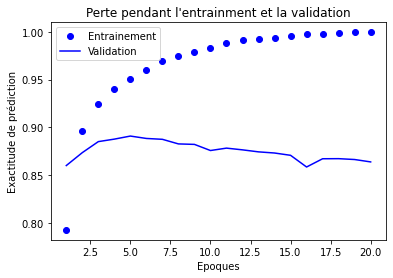

In [52]:
plt.plot(epoques,dico_historique['accuracy'],'bo',label='Entrainement')
plt.plot(epoques,dico_historique['val_accuracy'],'b',label='Validation')
plt.title('Perte pendant l\'entrainment et la validation')
plt.xlabel('Epoques')
plt.ylabel('Exactitude de prédiction')
plt.legend()
plt.show()

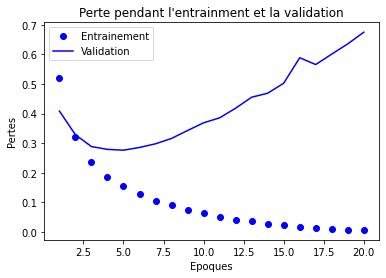

In [53]:
plt.plot(epoques,loss_values,'bo',label='Entrainement')
plt.plot(epoques,loss_values_val,'b',label='Validation')
plt.title('Perte pendant l\'entrainment et la validation')
plt.xlabel('Epoques')
plt.ylabel('Pertes')
plt.legend()
plt.show()

In [54]:
model.predict(Xtest)

array([[0.00774151],
       [1.        ],
       [0.9756637 ],
       ...,
       [0.00238615],
       [0.03482991],
       [0.56798637]], dtype=float32)

In [56]:
#avec 4 époques seulement
model.fit(Xtrain,ytrain,epochs=4,batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4211 - accuracy: 0.9423
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1680 - accuracy: 0.9550
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1251 - accuracy: 0.9620
Epoch 4/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1003 - accuracy: 0.9706


In [57]:
resultats=model.evaluate(Xtest,ytest)

782/782 [==============================] - 1s 1ms/step - loss: 0.4893 - accuracy: 0.8549
